In [1]:
# imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

import platform
import sys

# Multiple dataframes in single cell
from IPython.display import display

%matplotlib inline

In [2]:
# Working Dir / Load Data
if (platform.system() == 'Windows'):
    print('windows')
    workDir = 'D:\\project\\data\\kg_jpn_rest\\'
elif (platform.system() == 'Darwin'):
    print('Mac')
elif (platform.system() == 'Linux'):
    print('linux')

windows


In [3]:
# reservations in the air system
pd_air_reserve = pd.read_csv(workDir + 'air_reserve.csv', parse_dates=(['visit_datetime','reserve_datetime']), infer_datetime_format=True)
pd_air_reserve.name = 'pd_air_reserve'
#•	air_store_id - the restaurant's id in the air system
#•	visit_datetime - the time of the reservation
#•	reserve_datetime - the time the reservation was made
#•	reserve_visitors - the number of visitors for that reservation

# reservation in the hpg system
pd_hpg_reserve = pd.read_csv(workDir + 'hpg_reserve.csv', parse_dates=(['visit_datetime','reserve_datetime']), infer_datetime_format=True)
pd_hpg_reserve.name = 'pd_hpg_reserve'
#•	hpg_store_id - the restaurant's id in the hpg system
#•	visit_datetime - the time of the reservation
#•	reserve_datetime - the time the reservation was made
#•	reserve_visitors - the number of visitors for that reservation

# contains info about the store info.  lat and long is the area which the store belongs
pd_air_store_info = pd.read_csv(workDir + 'air_store_info.csv', infer_datetime_format=True)
pd_air_store_info.name = 'pd_air_store_info'
#•	air_store_id
#•	air_genre_name
#•	air_area_name
#•	latitude
#•	longitude

# contains info about select air restaraunts.  Lat and long is the area where store belongs
pd_hpg_store_info = pd.read_csv(workDir + 'hpg_store_info.csv', infer_datetime_format=True)
pd_hpg_store_info.name = 'pd_hpg_store_info'
#•	hpg_store_id
#•	hpg_genre_name
#•	hpg_area_name
#•	latitude
#•	longitude

# file contains HISTORICAL visit data for the air restaraunts
pd_air_visit_data = pd.read_csv(workDir + 'air_visit_data.csv', parse_dates=(['visit_date']), infer_datetime_format=True)
pd_air_visit_data.name = 'pd_air_visit_data'
#•	air_store_id
#•	visit_date - the date
#•	visitors - the number of visitors to the restaurant on the date

# give basic info about the calendar dates in the dataset
pd_date_info = pd.read_csv(workDir + 'date_info.csv', parse_dates=(['calendar_date']), infer_datetime_format=True)
pd_date_info.name = 'pd_date_info'

# allows you to join select restaraunts that have both air and hpg systems
pd_store_id_relation = pd.read_csv(workDir + 'store_id_relation.csv', infer_datetime_format=True)
pd_store_id_relation.name = 'pd_store_id_relation'
#•	hpg_store_id
#•	air_store_id

# pd_sample_submission = pd.read_csv(workDir + 'sample_submission.csv')

In [4]:
# Grab lengths
def fn_print_df_size(inputDF):
    print(inputDF.name)
    print('\n')
    print(inputDF.info())
    print('\n')
    #inputDF.head(5)

'''fn_print_df_size(pd_hpg_reserve)
fn_print_df_size(pd_air_store_info)
fn_print_df_size(pd_hpg_store_info)
fn_print_df_size(pd_air_visit_data)
fn_print_df_size(pd_date_info)
fn_print_df_size(pd_store_id_relation)
'''

'''
print('\n')
print(pd_air_reserve.info())
print('\n')
print(pd_hpg_reserve.info())
print('\n')
print(pd_air_store_info.info())
print('\n')
print(pd_hpg_store_info.info())
print('\n')
print(pd_air_visit_data.info())
print('\n')
print(pd_date_info.info())
print('\n')
print(pd_store_id_relation.info())
'''

def fn_display_df_datatypes_and_head(inputDF):
    display(pd.DataFrame(inputDF.dtypes))
    display(inputDF.head())

### AIR RESERVATION

In [5]:
#fn_print_df_size(pd_air_reserve)
display(pd.DataFrame(pd_air_reserve.dtypes))
display(pd_air_reserve.head())

,0
air_store_id,object
visit_datetime,datetime64[ns]
reserve_datetime,datetime64[ns]
reserve_visitors,int64


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [6]:
pd_air_reserve.tail()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10
92377,air_3cad29d1a23209d2,2017-05-31 21:00:00,2017-04-22 10:00:00,3


### HPG Reservation

In [7]:
### HPG Reservation (like Yelp)
fn_display_df_datatypes_and_head(pd_hpg_reserve)

,0
hpg_store_id,object
visit_datetime,datetime64[ns]
reserve_datetime,datetime64[ns]
reserve_visitors,int64


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


### Air Store Information

In [8]:
fn_display_df_datatypes_and_head(pd_air_store_info)

,0
air_store_id,object
air_genre_name,object
air_area_name,object
latitude,float64
longitude,float64


,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


### Hpg store info

In [9]:
fn_display_df_datatypes_and_head(pd_hpg_store_info)

,0
hpg_store_id,object
hpg_genre_name,object
hpg_area_name,object
latitude,float64
longitude,float64


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


### AIR Visit Data

In [10]:
fn_display_df_datatypes_and_head(pd_air_visit_data)

,0
air_store_id,object
visit_date,datetime64[ns]
visitors,int64


,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [11]:
fn_display_df_datatypes_and_head(pd_date_info)

,0
calendar_date,datetime64[ns]
day_of_week,object
holiday_flg,int64


,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [12]:
fn_display_df_datatypes_and_head(pd_store_id_relation)

,0
air_store_id,object
hpg_store_id,object


,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [13]:
print('Air Store Id Size: ' + str(len(pd_air_store_info['air_store_id'].unique())))
print('Hpg Store Id Size: ' + str(len(pd_hpg_store_info['hpg_store_id'].unique())))

Air Store Id Size: 829
Hpg Store Id Size: 4690


In [14]:
type(pd_store_id_relation)

pandas.core.frame.DataFrame

In [15]:
# 300 Stores
len(np.unique(pd_store_id_relation[['air_store_id', 'hpg_store_id']].values))

#np.unique(pd_store_id_relation[('air_store_id','hpg_store_id')].unique())
#pd.DataFrame(np.unique(df_leftOff[['store_nbr','item_nbr']], axis=0), columns=('store_nbr','item_nbr'))

300

## JOIN THE DATA - Moved this into a helper for single consolidated load

In [16]:
# Code to load notebooks borrowed from online
# http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Importing%20Notebooks.html
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell


def find_notebook(fullname, path=None):
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path
        
class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""
    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path
    
    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)
        
        print ("importing Jupyter notebook from %s" % path)
                                       
        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)
        
        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod
        
        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__
        
        try:
          for cell in nb.cells:
            if cell.cell_type == 'code':
                # transform the input to executable Python
                code = self.shell.input_transformer_manager.transform_cell(cell.source)
                # run the code in themodule
                exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod
    
class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""
    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]   
    
sys.meta_path.append(NotebookFinder())

In [17]:
import helper_notebook as hlp

importing Jupyter notebook from helper_notebook.ipynb


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [52]:
# Load the data set / cleaned, joined, and formatted
dfSuper = hlp.fn_load_all_data()

Data Load - Loading data on: Windows Directory: D:\project\data\kg_jpn_rest\
Data Load - Merging Data
Data Load - Adding Features
Data Load - Finished


In [53]:
# add the rolling mean / ewma
dfSuper, newcolNames = hlp.fn_ts_add_cycletrend_analysis(dfSuper, 'visitors')

In [19]:
dfSuper.head()

,air_store_id,visitors,calendar_date,day_of_week,holiday_flg,genre_name,area_name,latitude,longitude,reserve_visitors,month_num,month_name,dayofmonth_num,dayofweek_num,weekend,corr_vis_resv,forecast
visit_date,,,,,,,,,,,,,,,,,
2016-01-13,air_ba937bf13d40fb24,25.0,2016-01-13,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,Jan,13,2,0,0.0,0.0
2016-01-14,air_ba937bf13d40fb24,32.0,2016-01-14,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,Jan,14,3,0,0.0,0.0
2016-01-15,air_ba937bf13d40fb24,29.0,2016-01-15,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,Jan,15,4,1,0.0,0.0
2016-01-16,air_ba937bf13d40fb24,22.0,2016-01-16,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,Jan,16,5,1,0.0,0.0
2016-01-18,air_ba937bf13d40fb24,6.0,2016-01-18,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,Jan,18,0,0,0.0,0.0


## Need to determine what days, which restaraunts are closed

In [20]:
# Need to re-format this to include all days, and then perform this operation.
# could sweep through later and then apply

In [21]:
dfDaysClosed = dfSuper.copy()

In [22]:
# Syntax
'''
pd_hpg_reserve.sort_values(['hpg_store_id','visit_datetime'], ascending=[True,True], inplace=True)
pd_hpg_reserve['visit_date'] = pd_hpg_reserve['visit_datetime'].dt.date
hpgPivot = pd.pivot_table(pd_hpg_reserve, 
                          values='reserve_visitors', 
                          index=['hpg_store_id','visit_date'],
                          aggfunc=np.sum)
hpgPivot.reset_index(inplace=True)
hpgPivot['visit_date'] = hpgPivot['visit_date'].astype('datetime64[ns]')
hpgPivot.head()
'''

# x.pivot_table(values=['foo','bar'], index='name', aggfunc={'bar':np.mean, 'foo':sum})

dfDaysClosed = dfDaysClosed.pivot_table(values=['visitors','reserve_visitors'],
                                       index=['air_store_id','day_of_week'],
                                       aggfunc={'visitors':np.sum, 'reserve_visitors':np.sum})

In [23]:
# No days of week are closed (meaning across all restaraunts) - so holidays are possibly all open
dfDaysClosed[dfDaysClosed['visitors']==0]

,,reserve_visitors,visitors
air_store_id,day_of_week,,


In [24]:
# What about holidays?
dfDaysClosed = dfSuper.copy()
dfDaysClosed = dfDaysClosed.pivot_table(values=['visitors','reserve_visitors'],
                                       index=['air_store_id','visit_date','holiday_flg'],
                                       aggfunc={'visitors':np.sum, 'reserve_visitors':np.sum})
dfDaysClosed.reset_index(inplace=True)

In [25]:
#dfDaysClosed - !! NONE !!
dfDaysClosed.set_index('air_store_id')
dfDaysClosed[(dfDaysClosed['holiday_flg']==1) & (dfDaysClosed['visitors']==0)]

,air_store_id,visit_date,holiday_flg,reserve_visitors,visitors


In [26]:
dfDaysClosed[dfDaysClosed['holiday_flg']==1]

,air_store_id,visit_date,holiday_flg,reserve_visitors,visitors
34,air_00a91d42b08b08d9,2016-08-15,1,0.0,21.0
256,air_0164b9927d20bcc3,2016-11-03,1,0.0,3.0
270,air_0164b9927d20bcc3,2016-11-23,1,0.0,3.0
292,air_0164b9927d20bcc3,2016-12-23,1,2.0,10.0
297,air_0164b9927d20bcc3,2016-12-30,1,0.0,21.0
326,air_0164b9927d20bcc3,2017-02-11,1,0.0,3.0
381,air_0241aa3964b7f861,2016-01-03,1,0.0,10.0
388,air_0241aa3964b7f861,2016-01-11,1,0.0,16.0
449,air_0241aa3964b7f861,2016-03-20,1,0.0,11.0
450,air_0241aa3964b7f861,2016-03-21,1,0.0,22.0


In [27]:
# Next could check day of month?  -- Probably spend more time on other features / model

In [28]:
## Perhaps just start with holiday model and see how that goes

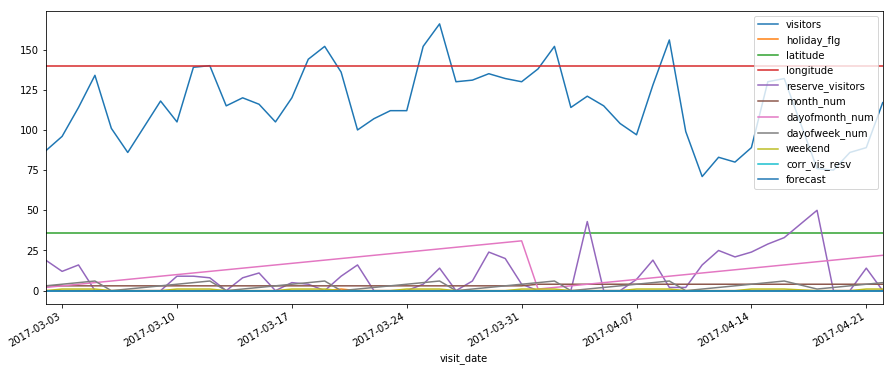

In [29]:
dfSuper[dfSuper['air_store_id']=='air_1c0b150f9e696a5f'].plot()

In [30]:
# Looking at some of the data here
TS = dfSuper.copy()

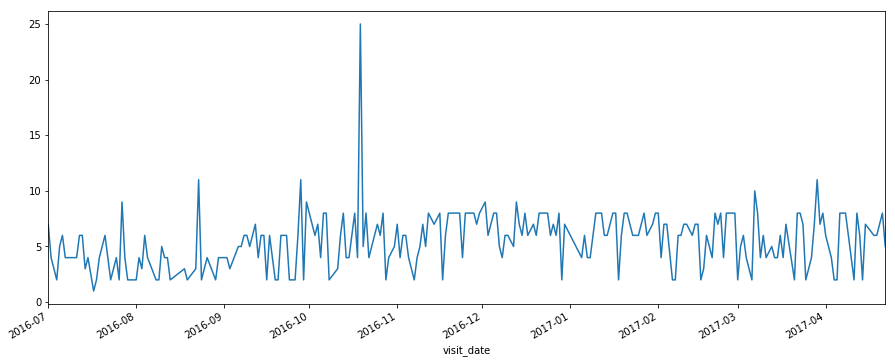

In [31]:
TS[TS['air_store_id'] == 'air_24e8414b9b07decb']['visitors'].plot()

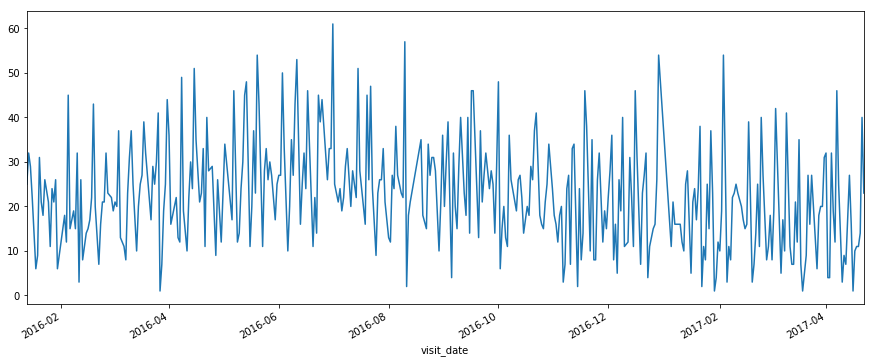

In [32]:
TS[TS['air_store_id'] == 'air_ba937bf13d40fb24']['visitors'].plot()

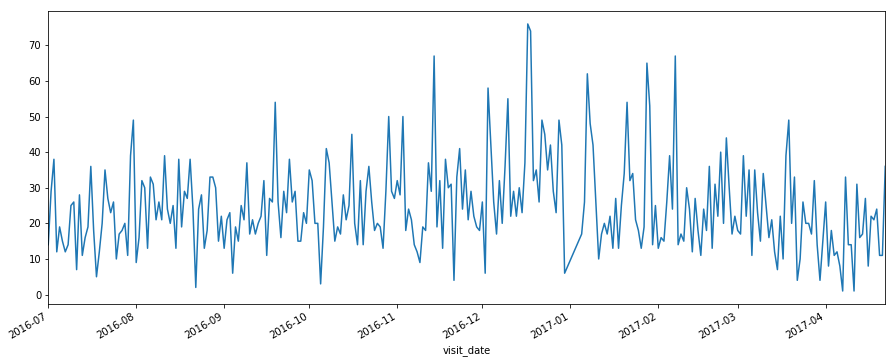

In [33]:
TS[TS['air_store_id'] == 'air_4579cb0669fd411b']['visitors'].plot()

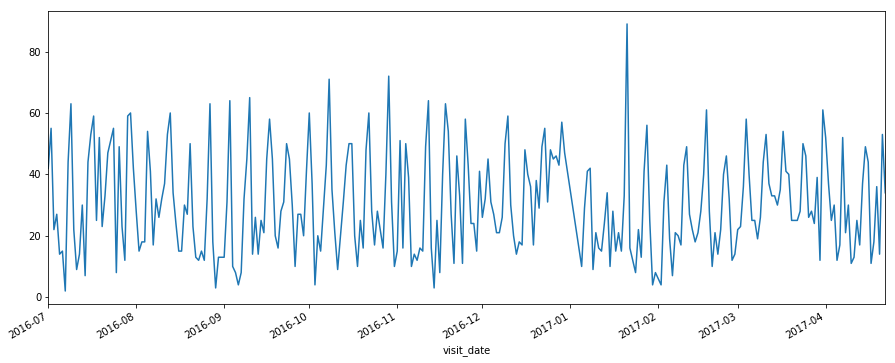

In [34]:
TS[TS['air_store_id'] == 'air_3440e0ea1b70a99b']['visitors'].plot()

## List of stores to sample.  5 random pulls + 5 that threw errors on first ARIMA run

In [35]:
randomPullList = ('air_55390f784018349a','air_bdd32aa407c16335',
                 'air_347be2c4feeb408b','air_2fed81034f8834e5',
                  'air_aed3a8b49abe4a48','air_63a88d81295195ed')

ErrorList = ('air_1c0b150f9e696a5f','air_7420042ff75f9aca',
             'air_789103bf53b8096b','air_900d755ebd2f7bbd',
             'air_a17f0778617c76e2','air_a9a380530c1e121f')

In [36]:
randomPullList[0]

'air_55390f784018349a'

In [37]:
def fn_plot_ts(df):
    df.plot()

In [38]:
dfSuper[dfSuper['air_store_id']=='air_a17f0778617c76e2'][['visitors','reserve_visitors']].head()

,visitors,reserve_visitors
visit_date,,
2017-03-07,20.0,0.0
2017-03-08,31.0,0.0
2017-03-09,18.0,0.0
2017-03-10,71.0,0.0
2017-03-11,98.0,0.0


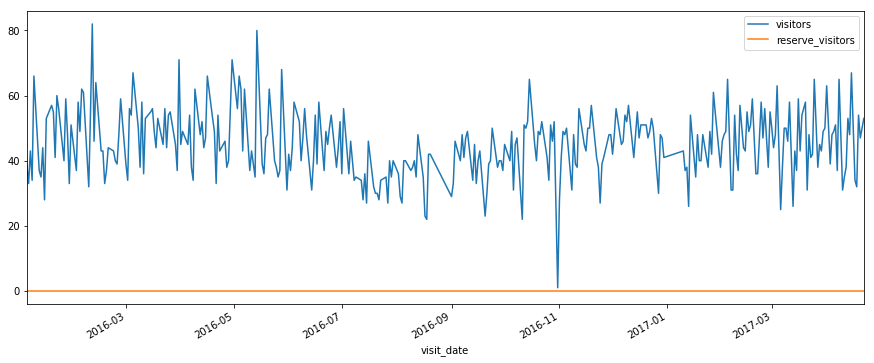

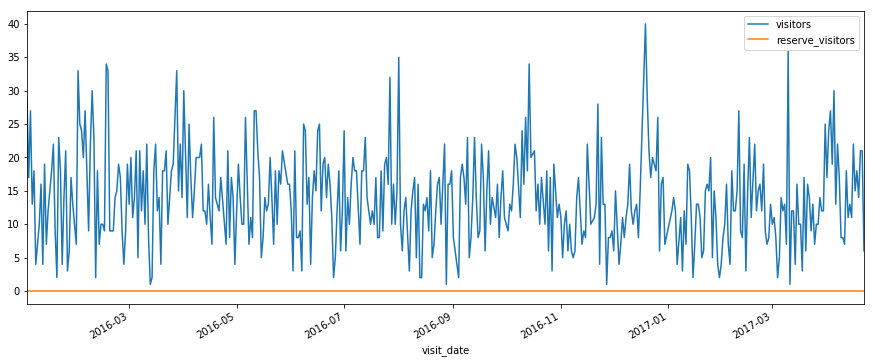

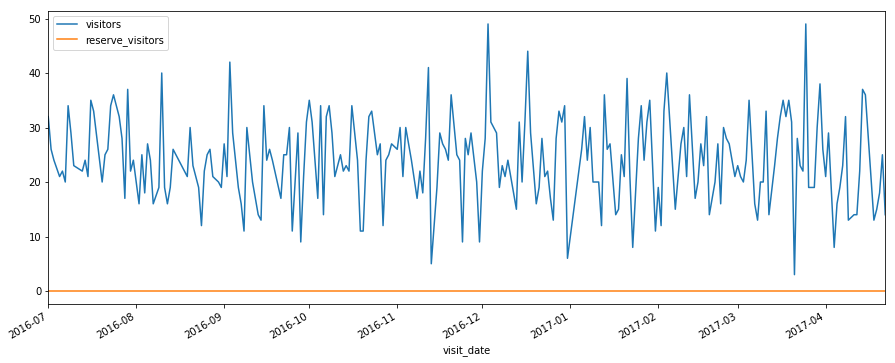

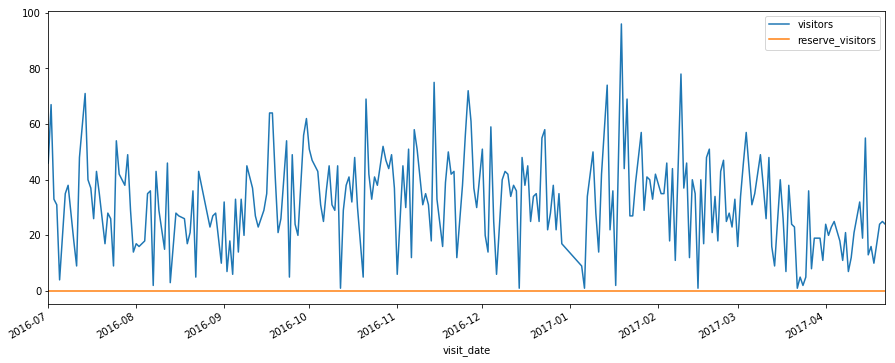

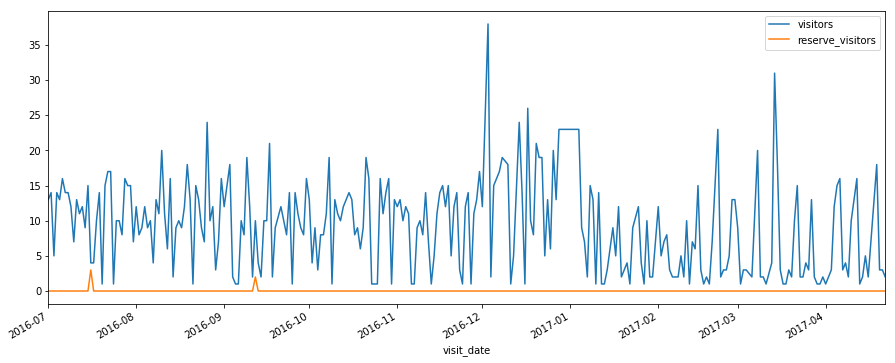

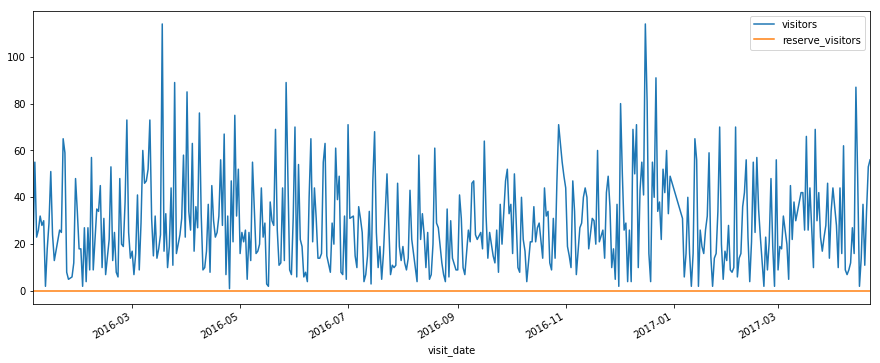

In [39]:
# So none of these use reservations
for i in range(len(randomPullList)):
    fn_plot_ts(dfSuper[dfSuper['air_store_id']==randomPullList[i]][['visitors','reserve_visitors']])



nan


nan


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5277: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


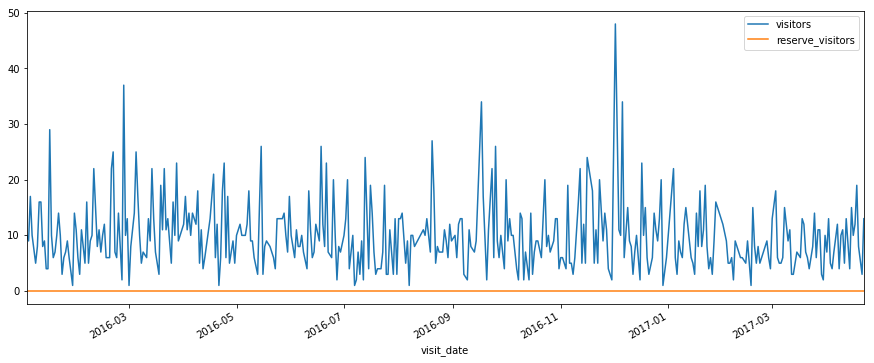

In [40]:
from scipy.stats.stats import pearsonr

# on that has reserve visitors - poor correlationg
storeid = 'air_1c0b150f9e696a5f'  

# pulled this from db sort by desc - .50 correlation (so 50/50)
storeid = 'air_b4f32bcc399da2b9'  
storeid = 'air_7514d90009613cd6'  # .46
storeid = 'air_db80363d35f10926'  # .66

# Has a bad one
storeid = 'air_0241aa3964b7f861' # lines up

# may want to think about standardizing the values and then reviwing.

# 'reserve_visitors'
print('\n')
print(pearsonr(dfSuper[dfSuper['air_store_id']==storeid]['visitors'], \
        dfSuper[dfSuper['air_store_id']==storeid]['reserve_visitors'])[0])

print('\n')
print(dfSuper[dfSuper['air_store_id']==storeid]['visitors'].corr(dfSuper[dfSuper['air_store_id']==storeid]['reserve_visitors']))

# but this one does and it seems somewhat correlated
fn_plot_ts(dfSuper[dfSuper['air_store_id']==storeid][['visitors','reserve_visitors']])

In [41]:
# After looking at the p-values of the reservations - it looked high.  Perhaps I need to split the data
#  so for that I will look at restaraunts perhaps that have strong correlations to determine whether or not to use in the model

In [42]:
dfSuper.head()

,air_store_id,visitors,calendar_date,day_of_week,holiday_flg,genre_name,area_name,latitude,longitude,reserve_visitors,month_num,month_name,dayofmonth_num,dayofweek_num,weekend,corr_vis_resv,forecast
visit_date,,,,,,,,,,,,,,,,,
2016-01-13,air_ba937bf13d40fb24,25.0,2016-01-13,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,Jan,13,2,0,0.0,0.0
2016-01-14,air_ba937bf13d40fb24,32.0,2016-01-14,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,Jan,14,3,0,0.0,0.0
2016-01-15,air_ba937bf13d40fb24,29.0,2016-01-15,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,Jan,15,4,1,0.0,0.0
2016-01-16,air_ba937bf13d40fb24,22.0,2016-01-16,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,Jan,16,5,1,0.0,0.0
2016-01-18,air_ba937bf13d40fb24,6.0,2016-01-18,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,1,Jan,18,0,0,0.0,0.0


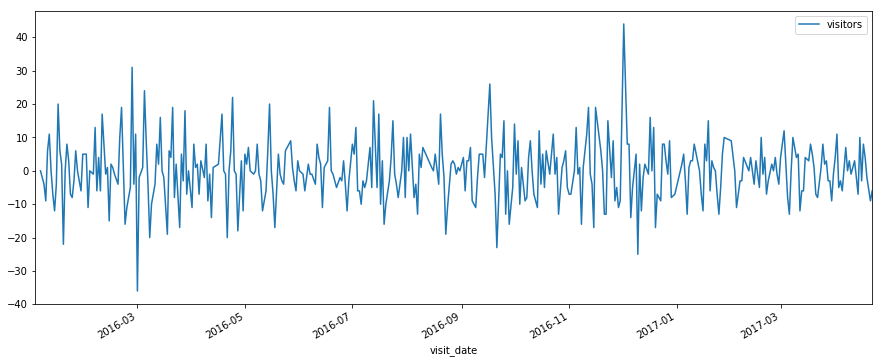

In [67]:
# Play aournd with 
storeid = 'air_0241aa3964b7f861'
dfSuper[dfSuper['air_store_id']==storeid][['visitors']].diff(3).plot()

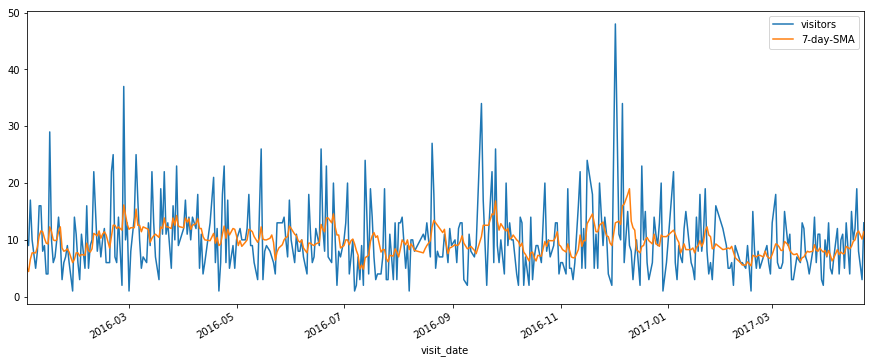

In [68]:
dfSuper[dfSuper['air_store_id']==storeid][['visitors','7-day-SMA']].plot()